In [17]:
# SSD

α=0.2

ps(x) = exp(-2log(α) + (2/α^2)*[-(a1*x^2)/2 + (7.5*a1+b1)*x + (-18.75*a1-5*b1+c1)*(log(abs(x))) - 
        (15.625*a1+6.25*b1-2.5*c1+d1)/x])

plot(ps,xlims=(0.1,4.2))

ErrorException: ps is not a Function, or is not defined at any of the values [-5.0, -1.0, 0.0, 0.01]

In [8]:
# LANDSCAPE

# U = -ln(Ps(x))

land(x) = -[-2log(α) + (2/α^2)*[-(a1*x^2)/2 + (7.5*a1+b1)*x + (-18.75*a1-5*b1+c1)*(log(abs(x))) - 
        (15.625*a1+6.25*b1-2.5*c1+d1)/x]]

plot(land)

ErrorException: land is not a Function, or is not defined at any of the values [-5.0, -1.0, 0.0, 0.01]

In [29]:
x = collect(0.1:0.01:4.0)
psx_norm = psx.(x)

MethodError: MethodError: no method matching +(::Float64, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(::Float64, !Matched::Float64) at float.jl:395
  +(::AbstractFloat, !Matched::Bool) at bool.jl:114
  ...

In [17]:
trim(psx; val=0.5) = x -> abs(psx(x)) > val ? NaN : psx(x)

trim (generic function with 1 method)

In [1]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

In [2]:
#########################################
# Potential function (V): 
# (a1*(x-2.5)^4)/4 - (b1*(x-2.5)^3)/3 - (c1*(x-2.5)^2)/2 - d1*(x-2.5)
#########################################

#########################################
# Deterministic Dynamics f(x): 
# -a1(x-2.5)^3 + b1(x-2.5)^2 + c1(x-2.5) + d1
#########################################

#########################################
# noise = multiplicative
# g(x) = alpha.x
#########################################

#########################################
# Parameters governing function
# a1=0.7
# b1=0.0
# c1=1.0
# d1=0.1
#########################################

####################################
# Stationary points
# stable stat: x=1.35832; x=3.7424
# saddle: x=2.3993
####################################

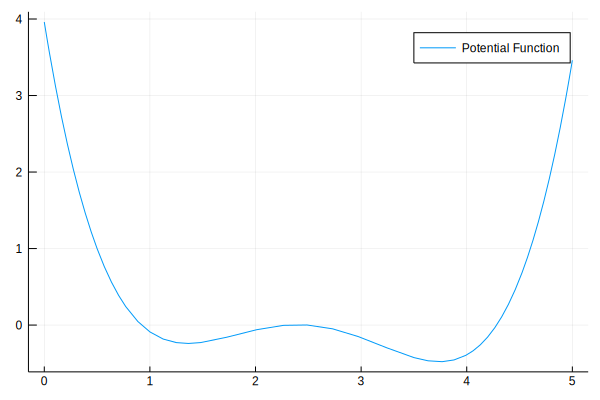

In [3]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

a1=0.7
b1=0.0
c1=1.0
d1=0.1

v(x) = (a1*(x-2.5)^4)/4 - (b1*(x-2.5)^3)/3 - (c1*(x-2.5)^2)/2 - d1*(x-2.5)

plot(v, 0,5, label=("Potential Function"))

In [8]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

# Computed analytically - see red notebook

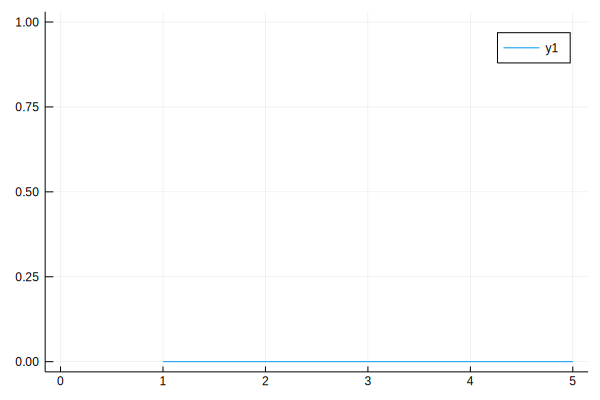

In [3]:
α = 1.0

Ps(x) = exp((-2log(x)) - ((a1*x^2)/(α^2)) + ((2*7.5*a1*x)/(α^2)) - ((2*18.75*a1*log(abs(x)))/(α^2)) - ((2*15.625*a1)/(α^2*x))\
+ ((2*b1*x)/(α^2)) - ((2*5*b1*log(abs(x)))/(α^2)) - ((2*6.25*b1)/(α^2*x))\
+ ((2*c1*log(abs(x)))/(α^2)) + ((2*2.5*c1)/(α^2*x))\
 - ((2*d1)/(α^2*x)))
    
plot(Ps)

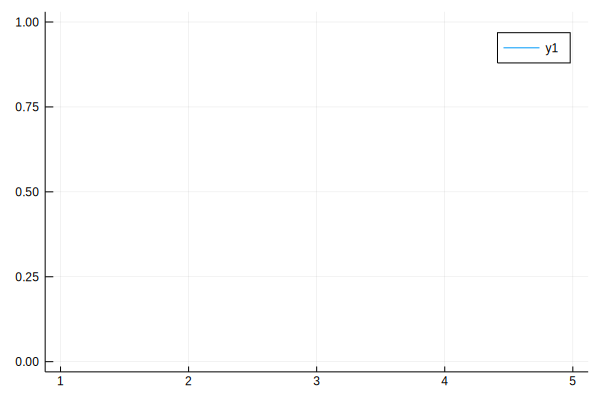

In [4]:
# Normalise the distribution

x = collect(1.0:0.01:5.0)
Ps_norm = Ps.(x)
Ps_norm = Ps_norm./0.01*sum(Ps_norm)
plot(x,Ps_norm)

In [17]:
##################################################
# LANDSCAPE RECOVER FROM U = -LOG(Ps(X))
##################################################

# Computed analytically

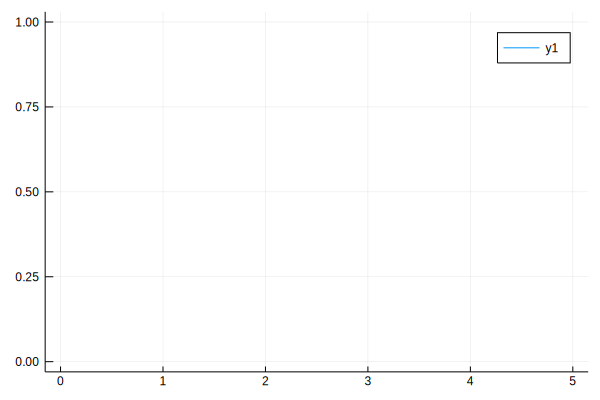

In [8]:
# Ps_land(x) = 2log(x) +(a1*x^2)/(2*α^2) -(7.5*a1*x)/(2) +(18.75*a1*log(abs(x)))/(α^2) +(15.625*a1)/(α^2*x)\
# -(b1*x)/(α^2) + (5*b1*log(abs(x)))/(α^2) + (6.25*b1)/(α^2*x)\
# -(c1*log(abs(x)))/(α^2) - (5/(2*x))/(α^2)\
#  +(d1)/(α*x)

# plot(Ps_land)

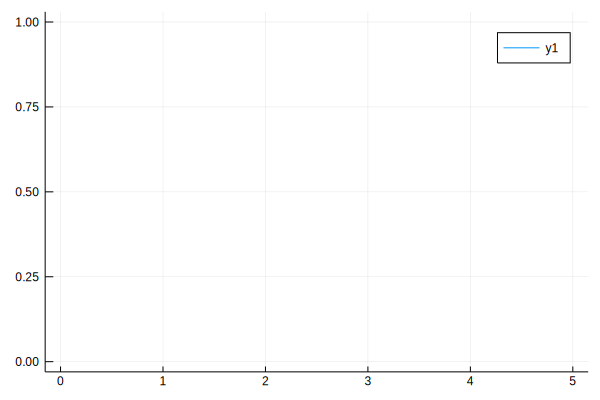

In [5]:
Ps_land(x) =  2log(x) + ((a1*x^2)/(α^2)) - ((2*7.5*a1*x)/(α^2)) + ((2*18.75*a1*log(abs(x)))/(α^2)) + ((2*15.625*a1)/(α^2*x))\
- ((2*b1*x)/(α^2)) + ((2*5*b1*log(abs(x)))/(α^2)) + ((2*6.25*b1)/(α^2*x))\
- ((2*c1*log(abs(x)))/(α^2)) - ((2*2.5*c1)/(α^2*x))\
 + ((2*d1)/(α^2*x))

plot(Ps_land)

In [ ]:
# Now since the above isn't working we try Susanne's suggestion
# Where we take the original ssd of the original polynomial function and intergrate over -2.5 and x-2.5

In [6]:
α = 0.1
f1_ssd(x) = exp(-2log(abs(x)) * [exp(-(a1*(x-2.5)^2)/(α^2)) + ((2*b1*(x-2.5))/(α^2)) + ((2*c1*log(abs(x-2.5))/α^2) - ((2*d1)/(α^2*(x-2.5)))) - exp(-((a1*(-2.5)^2)/(α^2)) + ((2*b1*(-2.5))/(α^2)) + ((2*c1*log(abs(-2.5))/α^2) - ((2*d1)/(α^2*(-2.5)))]
    
plot(f1_ssd)

LoadError: syntax: missing comma or ) in argument list

In [52]:
# a_sol = -(a1*x^2)/(2*α^2) +(7.5*a1*x)/(2) -(18.75*a1*log(abs(x)))/(α^2) -(15.625*a1)/(α^2*x)
# b_sol = +(b1*x)/(α^2) - (5*b1*log(abs(x)))/(α^2) - (6.25*b1)/(α^2*x)
# c_sol = +(c1*log(abs(x)))/(α^2) + (5/(2*x))/(α^2)
# d_sol = -(d1)/(α*x)